# An analysis of Canada's labour market from 1976 - Present

Author: Rehan Nasir

This project takes an in-depth look at employment trends for each province and for Canada, using historical data spanning from 1976 to the present.

My other goal is to use ARIMA to predict future employment trends.

## 1 - Loading the dataset

### [Dataset source](https://www.kaggle.com/datasets/pienik/unemployment-in-canada-by-province-1976-present)

This dataset uses REAL, verified data from [14-10-0287-03 Labour force characteristics by province, monthly, seasonally adjusted](https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1410028703).


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


url = "https://raw.githubusercontent.com/rehan-nasir/unemployment_rate_canada/refs/heads/main/dataset/Unemployment_Canada_1976_present.csv"

labor_data = pd.read_csv(url, sep=",")
labor_data.head()

,REF_DATE,GEO,Sex,Age group,Employment,Full-time employment,Labour force,Part-time employment,Population,Unemployment,Employment rate,Participation rate,Unemployment rate
0,1976-01,Alberta,Both sexes,15 to 24 years,231800.0,174900.0,252300.0,56900.0,362300.0,20500.0,64.0,69.6,8.1
1,1976-01,Alberta,Both sexes,15 to 64 years,802400.0,682100.0,837500.0,120300.0,1154800.0,35000.0,69.5,72.5,4.2
2,1976-01,Alberta,Both sexes,15 years and over,819500.0,693700.0,856500.0,125800.0,1276700.0,37000.0,64.2,67.1,4.3
3,1976-01,Alberta,Both sexes,25 to 54 years,491400.0,439800.0,505800.0,51600.0,661700.0,14400.0,74.3,76.4,2.8
4,1976-01,Alberta,Both sexes,25 years and over,587700.0,518800.0,604200.0,68900.0,914400.0,16500.0,64.3,66.1,2.7


In [3]:
labor_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38985 entries, 0 to 38984
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   REF_DATE               38985 non-null  object 
 1   GEO                    38985 non-null  object 
 2   Sex                    38985 non-null  object 
 3   Age group              38985 non-null  object 
 4   Employment             38985 non-null  float64
 5   Full-time employment   37290 non-null  float64
 6   Labour force           38985 non-null  float64
 7   Part-time employment   37289 non-null  float64
 8   Population             38985 non-null  float64
 9   Unemployment           38979 non-null  float64
 10  Employment rate        38985 non-null  float64
 11  Participation rate     38985 non-null  float64
 12  Unemployment rate      38979 non-null  float64
dtypes: float64(9), object(4)
memory usage: 3.9+ MB


Dataset Columns:
- REF_DATE: Year and Month
- GEO: Province or Country
- Sex: Both sexes (Data for individual sexes is unavailable.)
- Age Group: Range of ages in years.
- Employment: Number of people employed in both full-time and part-time jobs.
- Full-time Employment: Number of people employed in a full-time job.
- Labour force: Number of civilian, non-institutionalized people 15 years of age and over who, during the reference week, were employed or unemployed.
- Part-time Employment: Number of people employed in a part-time job.
- Population: Number of people that are of working age, 15 years and over.
- Unemployment: Number of people who, during the reference week, were without work, had looked for work in the past four weeks, and were available for work. Those persons on layoff or who had a new job to start in four weeks or less are considered unemployed.
- Employment rate: % of people employed.
- Participation rate: The participation rate is the number of labour force participants expressed as a percentage of the population 15 years of age and over. 
- Unemployment rate: % of people unemployed.

## 2 - Cleaning the data

In [4]:
labor_data.isna().sum()

REF_DATE                    0
GEO                         0
Sex                         0
Age group                   0
Employment                  0
Full-time employment     1695
Labour force                0
Part-time employment     1696
Population                  0
Unemployment                6
Employment rate             0
Participation rate          0
Unemployment rate           6
dtype: int64

Columns Full-time employment and Part-time employment have missing/null values. Before I do anything, I should look at which rows contain these null values, and see if there's a pattern.

In [5]:
labor_data[labor_data.isna().any(axis=1)]



,REF_DATE,GEO,Sex,Age group,Employment,Full-time employment,Labour force,Part-time employment,Population,Unemployment,Employment rate,Participation rate,Unemployment rate
12,1976-01,Canada,Both sexes,15 to 19 years,999200.0,NaN,1178900.0,NaN,2330000.0,179700.0,42.9,50.6,15.2
16,1976-01,Canada,Both sexes,20 to 24 years,1500400.0,NaN,1670500.0,NaN,2179800.0,170100.0,68.8,76.6,10.2
19,1976-01,Canada,Both sexes,55 to 64 years,955600.0,NaN,999700.0,NaN,1886900.0,44100.0,50.6,53.0,4.4
81,1976-02,Canada,Both sexes,15 to 19 years,1000500.0,NaN,1177800.0,NaN,2333000.0,177300.0,42.9,50.5,15.1
85,1976-02,Canada,Both sexes,20 to 24 years,1508600.0,NaN,1679300.0,NaN,2185200.0,170700.0,69.0,76.8,10.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38863,2022-12,Canada,Both sexes,20 to 24 years,1708900.0,NaN,1864200.0,NaN,2404600.0,155300.0,71.1,77.5,8.3
38866,2022-12,Canada,Both sexes,55 to 64 years,3300500.0,NaN,3451000.0,NaN,5144500.0,150600.0,64.2,67.1,4.4
38928,2023-01,Canada,Both sexes,15 to 19 years,959600.0,NaN,1090200.0,NaN,2112500.0,130600.0,45.4,51.6,12.0
38932,2023-01,Canada,Both sexes,20 to 24 years,1726700.0,NaN,1879500.0,NaN,2412000.0,152700.0,71.6,77.9,8.1


By looking at all the rows containing null values, we can see null values are only in rows that have "Canada" under GEO.
Upon further inspection, I see that these null values occur because of age group values exclusive to "Canada". I can prove this by checking the unique age group values Canada and the provinces have.

In [6]:
country_age_groups = labor_data[labor_data["GEO"] == "Canada"]["Age group"]
provincial_age_groups = labor_data[labor_data["GEO"] != "Canada"]["Age group"]

exclusive_age_groups = list((set(country_age_groups.values) ^ set(provincial_age_groups.values)))
exclusive_age_groups

['15 to 19 years', '20 to 24 years', '55 to 64 years']

Age groups 55-64, 15-29, and 20-24 years are not shared between country and provincial age groups. To keep things consistent, I will drop any row containing these age groups.

In [7]:
clean_labor_data = labor_data.dropna()
clean_labor_data.isna().sum()

REF_DATE                 0
GEO                      0
Sex                      0
Age group                0
Employment               0
Full-time employment     0
Labour force             0
Part-time employment     0
Population               0
Unemployment             0
Employment rate          0
Participation rate       0
Unemployment rate        0
dtype: int64

Now that null values are taken care of, I'll check for any duplicate rows.

In [8]:
clean_labor_data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
38980    False
38981    False
38982    False
38983    False
38984    False
Length: 37283, dtype: bool

Fortunately, there are no duplicates in our dataset. 

## 3- Exploratory Data Analysis

Goals:
- Line graph of unemployment rate by GEO and REF_DATE
- Since we will only look at the overall working labor force of Canada, I will only take the age group 15-64 years for analysis.

In [9]:
labor_force = clean_labor_data[clean_labor_data['Age group'] == '15 to 64 years']
labor_force

,REF_DATE,GEO,Sex,Age group,Employment,Full-time employment,Labour force,Part-time employment,Population,Unemployment,Employment rate,Participation rate,Unemployment rate
1,1976-01,Alberta,Both sexes,15 to 64 years,802400.0,682100.0,837500.0,120300.0,1154800.0,35000.0,69.5,72.5,4.2
7,1976-01,British Columbia,Both sexes,15 to 64 years,1015500.0,867400.0,1108500.0,148000.0,1628800.0,93000.0,62.3,68.1,8.4
14,1976-01,Canada,Both sexes,15 to 64 years,9465600.0,8315800.0,10185000.0,1149800.0,15015900.0,719400.0,63.0,67.8,7.1
22,1976-01,Manitoba,Both sexes,15 to 64 years,418600.0,363600.0,442500.0,55100.0,635700.0,23900.0,65.8,69.6,5.4
28,1976-01,New Brunswick,Both sexes,15 to 64 years,227100.0,199500.0,255700.0,27600.0,419800.0,28700.0,54.1,60.9,11.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38956,2023-01,Nova Scotia,Both sexes,15 to 64 years,472600.0,395300.0,498500.0,77300.0,632500.0,25900.0,74.7,78.8,5.2
38962,2023-01,Ontario,Both sexes,15 to 64 years,7450000.0,6257000.0,7872900.0,1193000.0,9908200.0,422900.0,75.2,79.5,5.4
38968,2023-01,Prince Edward Island,Both sexes,15 to 64 years,78900.0,67100.0,85400.0,11900.0,108100.0,6500.0,73.0,79.0,7.6
38974,2023-01,Quebec,Both sexes,15 to 64 years,4294200.0,3587000.0,4481200.0,707100.0,5433300.0,187100.0,79.0,82.5,4.2


## Employment and Unemployment rates for the entirety of Canada

In [10]:
canada = labor_force[labor_force['GEO'] == 'Canada']
canada["REF_DATE"] = pd.to_datetime(canada["REF_DATE"])

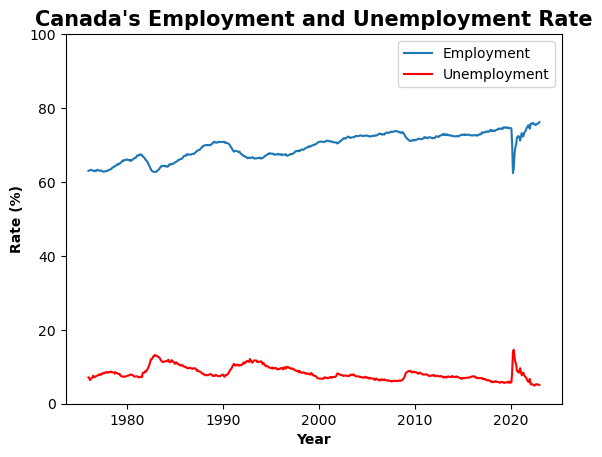

In [89]:
sns.lineplot(x='REF_DATE', y='Employment rate', data=canada, label='Employment')
sns.lineplot(x='REF_DATE', y='Unemployment rate', data=canada, color='red', label='Unemployment')
plt.title("Canada's Employment and Unemployment Rate", fontsize=15, fontweight="bold")
plt.ylim(0, 100)
plt.ylabel("Rate (%)", fontsize=10, fontweight="bold")
plt.xlabel("Year", fontsize=10, fontweight="bold")
plt.show()

## Employment rate by province

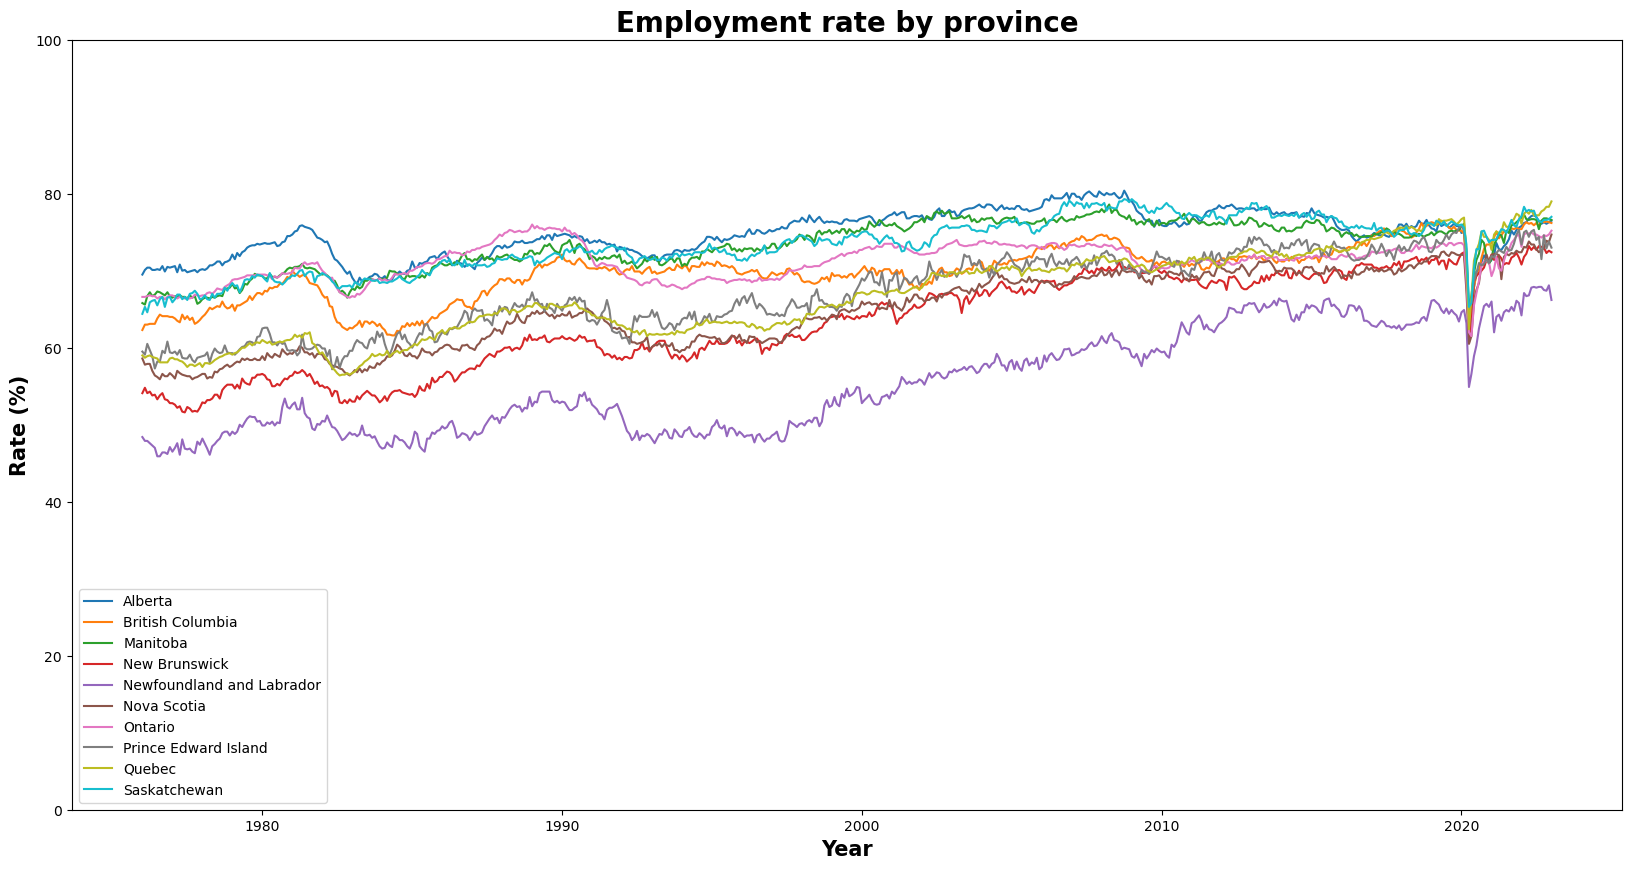

In [90]:

provinces_list = []

provinces = labor_force[labor_force["GEO"] != "Canada"]["GEO"].unique()
for i in provinces:
    p = labor_force[labor_force['GEO'] == i]
    p["REF_DATE"] = pd.to_datetime(p["REF_DATE"])
    provinces_list.append(p)

for j in provinces_list:
        sns.lineplot(x='REF_DATE', y='Employment rate', data=j, label=j["GEO"].iloc[0])
plt.ylim(0, 100)
plt.xlabel("Year", fontsize=15, fontweight="bold")
plt.ylabel("Rate (%)", fontsize=15, fontweight="bold")
plt.title("Employment rate by province", fontsize=20, fontweight="bold")
plt.gcf().set_size_inches(20, 10)
plt.show()


All provinces are show a dip in the employment rate and a spike in the unemployment rate around 2020, the same time when the COVID-19 pandemic began. Luckily, the employment rate recovered back to where it originally was.

Overall, the employment rate for the whole country has been increasing, and is currently at the highest it's ever been.

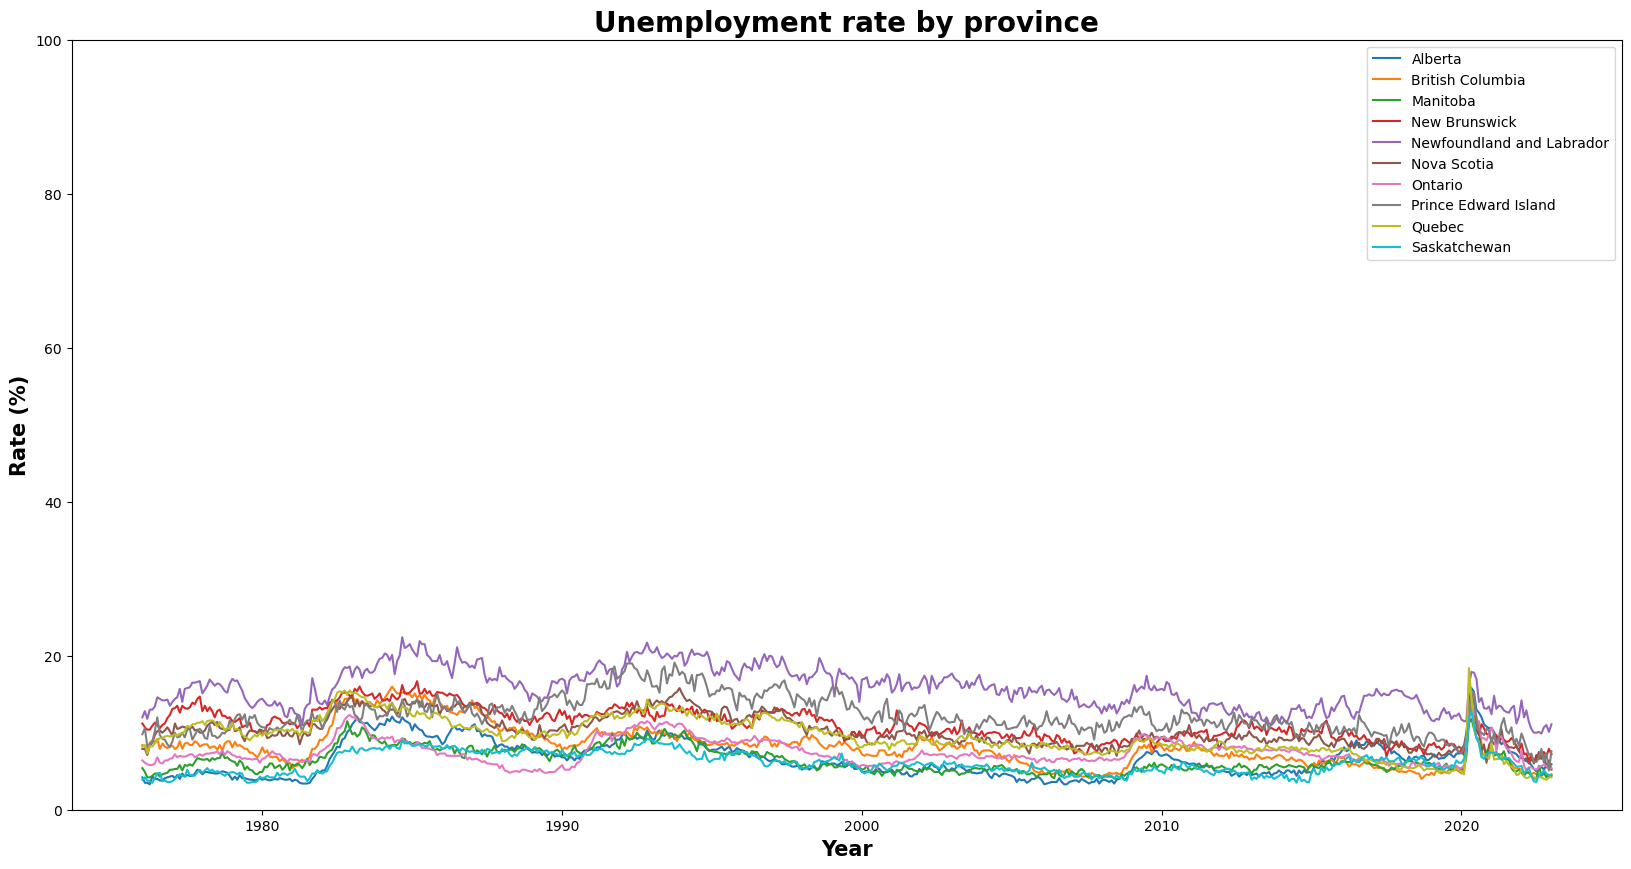

In [96]:
provinces_list = []

provinces = labor_force[labor_force["GEO"] != "Canada"]["GEO"].unique()
for i in provinces:
    p = labor_force[labor_force['GEO'] == i]
    p["REF_DATE"] = pd.to_datetime(p["REF_DATE"])
    provinces_list.append(p)

for j in provinces_list:
        sns.lineplot(x='REF_DATE', y='Unemployment rate', data=j, label=j["GEO"].iloc[0])
plt.ylim(0, 100)
plt.xlabel("Year", fontsize=15, fontweight="bold")
plt.ylabel("Rate (%)", fontsize=15, fontweight="bold")
plt.title("Unemployment rate by province", fontsize=20, fontweight="bold")
plt.gcf().set_size_inches(20, 10)
plt.show()

## Population of Work Force

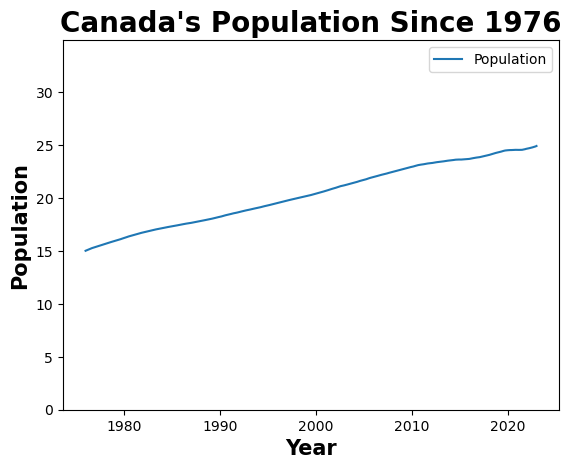

In [92]:
years = canada["REF_DATE"].dt.year.unique()
canada[canada["REF_DATE"].dt.year == years[len(years) - 1]]['Population']
pop_in_mil = canada['Population']/1000000
line = sns.lineplot(x='REF_DATE', y=pop_in_mil, data=canada, label='Population')
plt.ylim(0, pop_in_mil.max() + 10)
plt.title("Canada's Population Since 1976", fontsize=20, fontweight="bold")
plt.xlabel("Year", fontsize=15, fontweight="bold")
plt.ylabel("Population", fontsize=15, fontweight="bold")
plt.show()

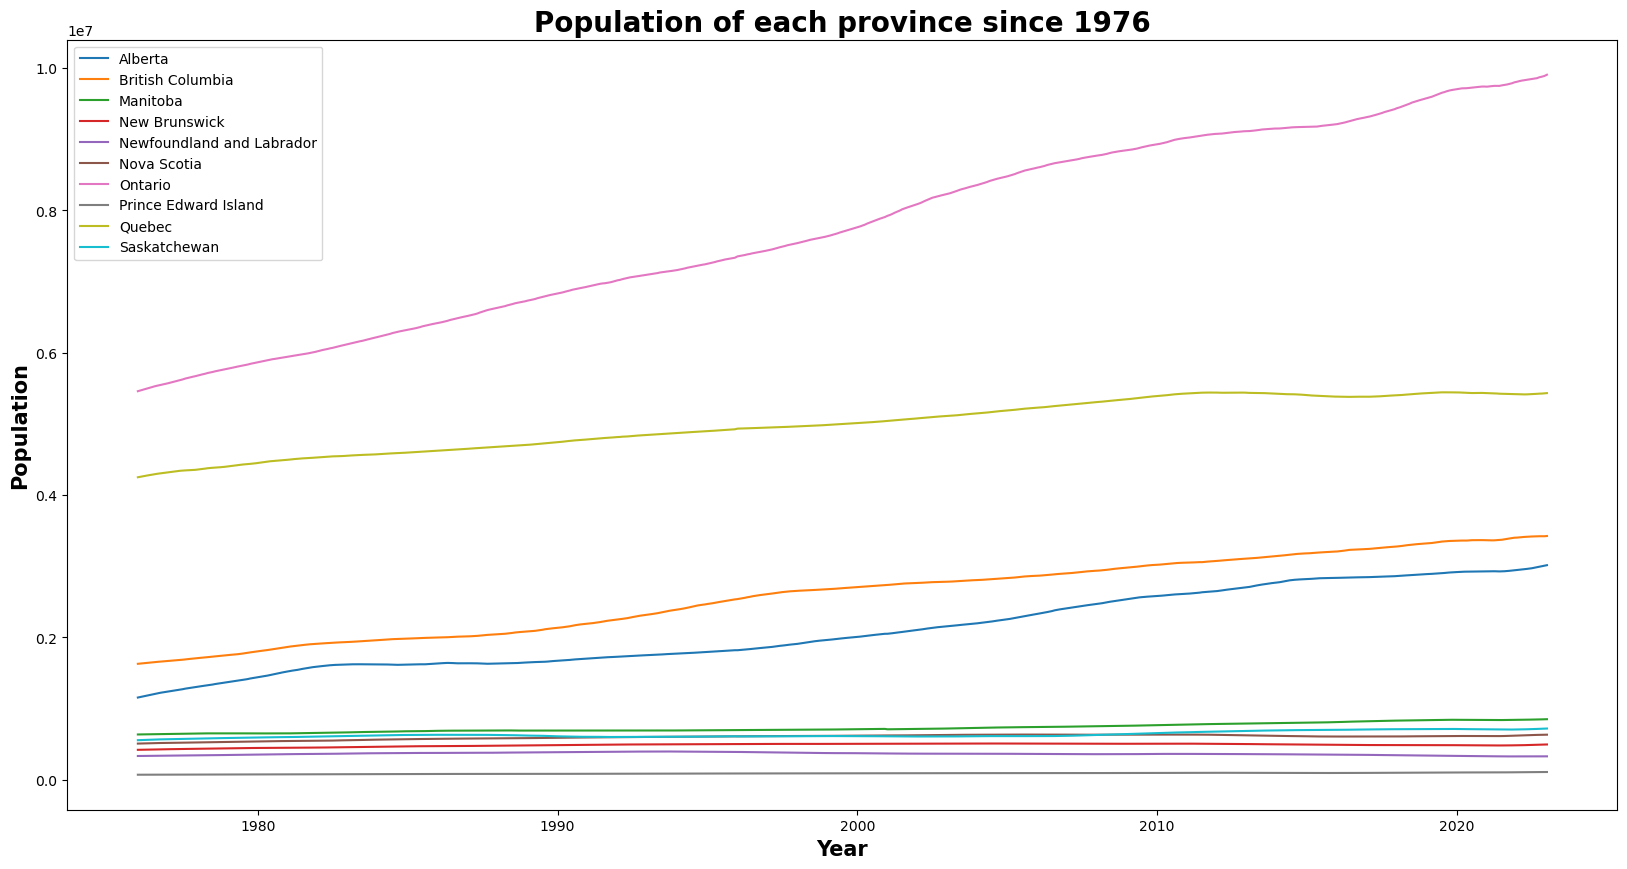

In [84]:
provinces_list = []
for i in provinces:
    p = labor_force[labor_force['GEO'] == i]
    p["REF_DATE"] = pd.to_datetime(p["REF_DATE"])
    provinces_list.append(p)

for j in provinces_list:
    sns.lineplot(x='REF_DATE', y='Population', data=j, label=j["GEO"].iloc[0])
plt.title("Population of each province since 1976", fontsize=20, fontweight="bold")
plt.xlabel("Year", fontsize=15, fontweight="bold")
plt.ylabel("Population", fontsize=15, fontweight="bold")
plt.gcf().set_size_inches(20, 10)
plt.show()


In [15]:
print('Population differences from 1976 to now')
for i in provinces:
    print(i)
    p = labor_force[labor_force['GEO'] == i]
    print(p.iloc[len(p) - 1]["Population"] - p.iloc[0]["Population"])


Population differences from 1976 to now
Alberta
1860200.0
British Columbia
1796100.0
Manitoba
214500.0
New Brunswick
75300.0
Newfoundland and Labrador
-4900.0
Nova Scotia
125000.0
Ontario
4448000.0
Prince Edward Island
38200.0
Quebec
1182600.0
Saskatchewan
163900.0


The working population has steadily increased by atleast 10 million in Canada. Looking at the provinces, Ontario, Quebec, British Columbia, and Alberta have noticeable increases in their working population. The only province that has had a DECLINE in their working population is Newfoundland and Labrador, which has lost 4900 members of the working population since 1976. 

There also does appear to be a correlation between Population and Employment rate. As population increases, the employment rate does too. We can verify this with a correlation matrix.

In [16]:
canada.corr(numeric_only=True)

,Employment,Full-time employment,Labour force,Part-time employment,Population,Unemployment,Employment rate,Participation rate,Unemployment rate
Employment,1.000000,0.997343,0.996268,0.969762,0.992515,0.228304,0.934642,0.925126,-0.580129
Full-time employment,0.997343,1.000000,0.990265,0.949405,0.987437,0.189851,0.933700,0.908809,-0.610411
Labour force,0.996268,0.990265,1.000000,0.977383,0.997202,0.311488,0.912037,0.930785,-0.508919
Part-time employment,0.969762,0.949405,0.977383,1.000000,0.970677,0.348184,0.901214,0.943577,-0.455981
Population,0.992515,0.987437,0.997202,0.970677,1.000000,0.321251,0.887146,0.902752,-0.500161
Unemployment,0.228304,0.189851,0.311488,0.348184,0.321251,1.000000,-0.002247,0.313986,0.646353
Employment rate,0.934642,0.933700,0.912037,0.901214,0.887146,-0.002247,1.000000,0.941099,-0.722253
Participation rate,0.925126,0.908809,0.930785,0.943577,0.902752,0.313986,0.941099,1.000000,-0.446343
Unemployment rate,-0.580129,-0.610411,-0.508919,-0.455981,-0.500161,0.646353,-0.722253,-0.446343,1.000000


Population vs. Employment rate has a correlation of 0.887146, which is fairly strong. We can see stronger correlations between other variables too.

Strong Correlations
- Employment has strong correlations with:
    - Full-time Employment
    - Labour Force
    - Part-time employment
    - Population
    - Employment rate
    - Participation rate


Which go back to the assumption I made earlier: As population increases, the employment does too.

Other Correlations:
- Employment Rate vs. Unemployment Rate
    - As employment rate rises, the unemployment rate decreases.



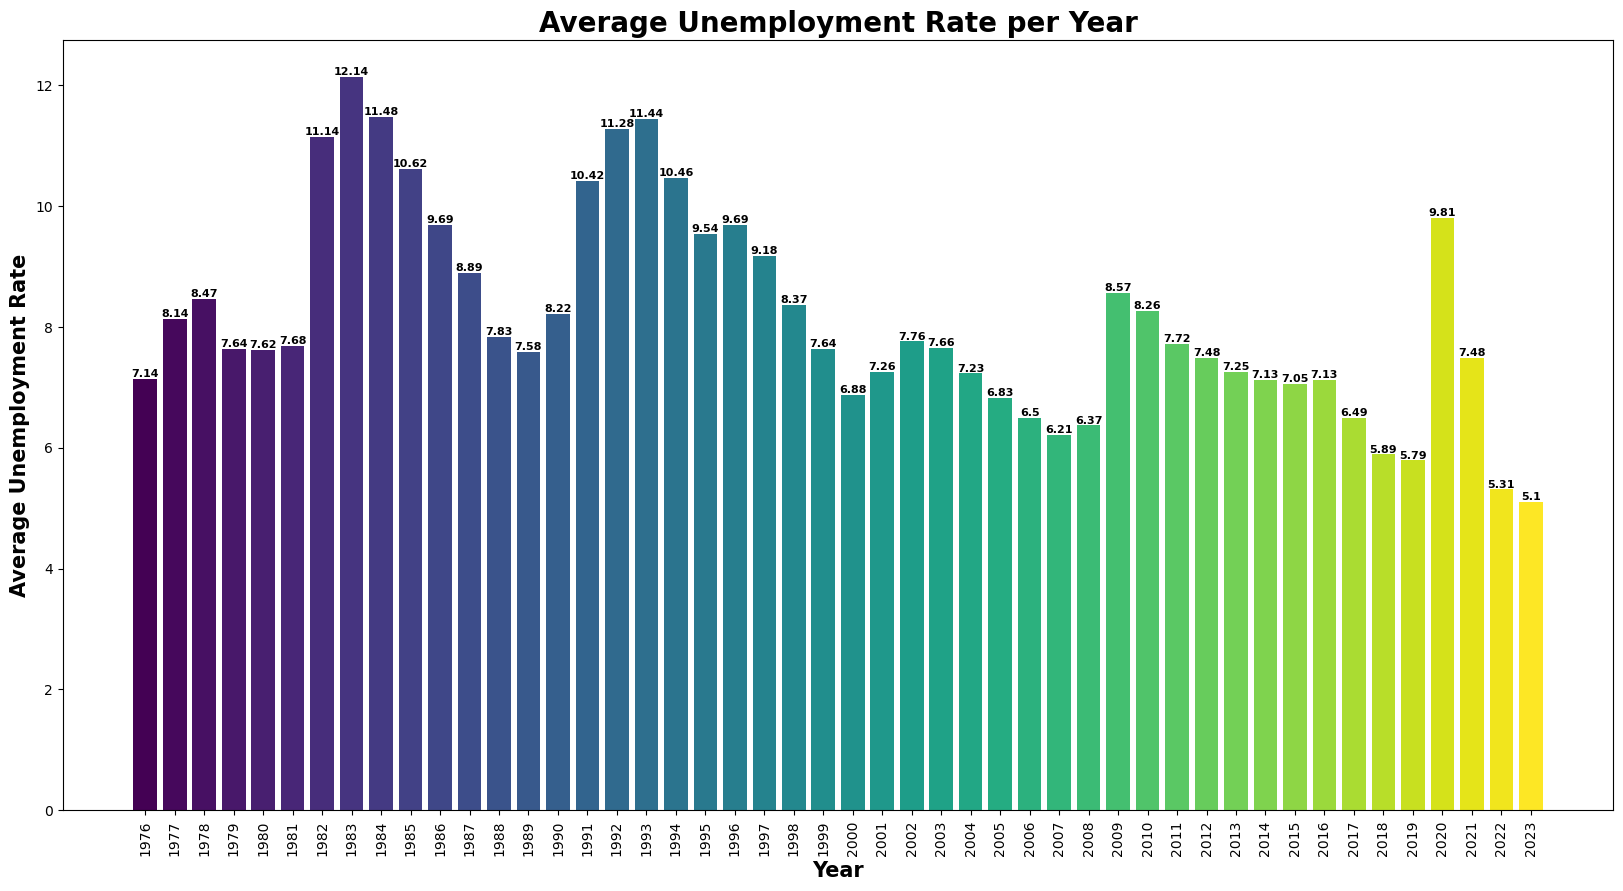

In [63]:
avg_unemployment_rates = []
for year in years:
    avg_unemployment_rates.append(round(canada[canada["REF_DATE"].dt.year == year]["Unemployment rate"].mean(), 2))

colors = plt.cm.viridis(np.linspace(0, 1, len(years)))
bars = plt.bar(years, avg_unemployment_rates, color=colors)
plt.gcf().set_size_inches(20, 10)
plt.title("Average Unemployment Rate per Year", fontsize=20, fontweight='bold')
plt.xlabel("Year", fontsize=15, fontweight='bold')
plt.ylabel("Average Unemployment Rate", fontsize=15, fontweight='bold')
plt.xticks(years, rotation=90)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, str(yval), ha='center', va='bottom', fontsize=8, fontweight='bold')

plt.show()


The year with the highest average unemployment rate was in 1984, which could have been due to the economic recession. The average unemployment in 2023 is the lowest ever recorded, which is good considering how much the population has increased.

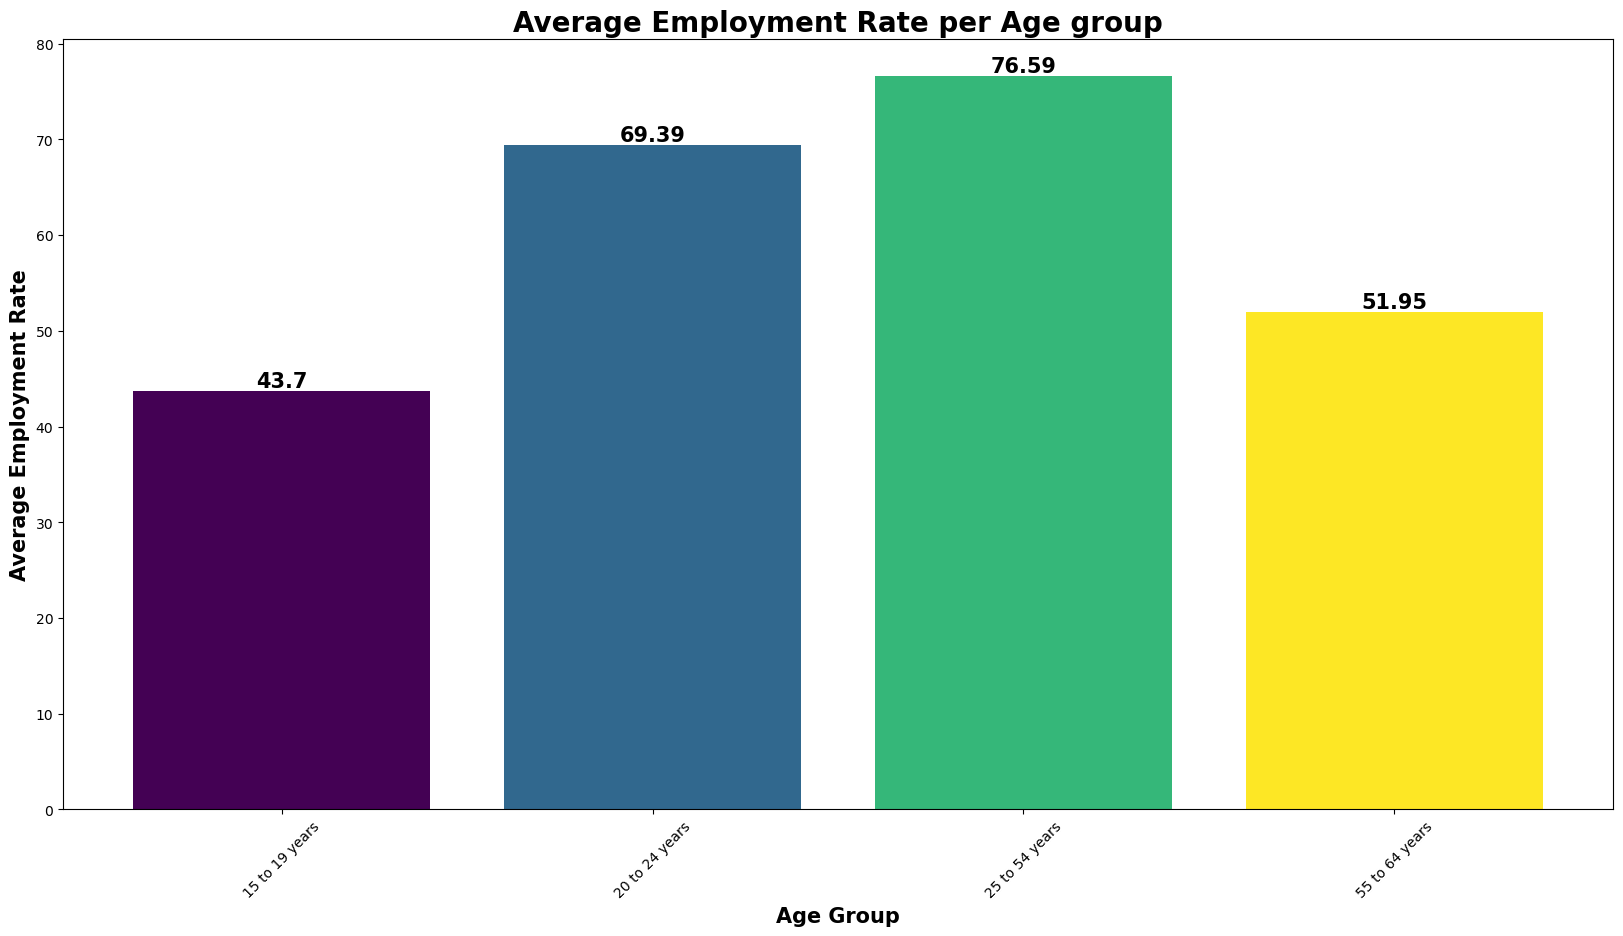

In [144]:
l = labor_data[(labor_data['Age group'] != '15 years and over') & (labor_data['Age group'] != '15 to 64 years') & (labor_data['Age group'] != '15 to 24 years') & (labor_data['Age group'] != '25 years and over') & (labor_data['Age group'] != '55 years and over')]
labor_age_groups = l[l['GEO'] == 'Canada']['Age group'].unique()

age_list = []
for age_group in labor_age_groups:
    a = round(labor_data[labor_data['Age group'] == age_group]['Employment rate'].mean(), 2)
    age_list.append(a)



colors = plt.cm.viridis(np.linspace(0, 1, len(labor_age_groups)))
bars = plt.bar(labor_age_groups, age_list, color=colors)
plt.gcf().set_size_inches(20, 10)
plt.title("Average Employment Rate per Age group", fontsize=20, fontweight='bold')
plt.xlabel("Age Group", fontsize=15, fontweight='bold')
plt.ylabel("Average Employment Rate", fontsize=15, fontweight='bold')
plt.xticks(labor_age_groups, rotation=45)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, str(yval), ha='center', va='bottom', fontsize=15, fontweight='bold')

plt.show()

15 - 19 years
- The lowest average employment rate.
- People in this range are underqualified to work in most full-time jobs, and are most-likely focused on pursuing their high school diploma.
- Some might work part-time jobs while still in school.

15 - 24 years
- The second highest average employment rate.
- People in this range are mainly focused on their post-secondary education.
- Post-secondary students might do internships or work-part time jobs.
- Those who didn't pursue a post-secondary education will work full-time jobs.

25 - 54 years
- The highest average employment rate.
- Most people in this range have completed their post-secondary education, some might pursue post-grad degrees.
- Many will start to transition into full-time jobs.

55 - 64 years
- The second lowest average employment rate.
- People in this range are close to retirement.